Package installation

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Reading data csv file


In [121]:
BigmartData = pd.read_csv(r'C:\Users\pc\Downloads\Train.csv')

In [122]:
BigmartData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
BigmartData.shape

(8523, 12)

In [124]:
BigmartData.Item_Identifier.value_counts()
BigmartData.drop(labels='Item_Identifier',axis=1,inplace=True)

In [125]:
BigmartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Checking missing values

In [126]:
BigmartData.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

In [127]:
#Mean value for item weight
BigmartData['Item_Weight'].mean()

12.857645184136183

In [128]:
#fill the missing values in item weight with the mean
BigmartData['Item_Weight'].fillna(BigmartData['Item_Weight'].mean(),inplace=True)

In [129]:
BigmartData.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [130]:
#fill the missing values in outlet size with the mode
#calculating mode
print('mode{}'.format(BigmartData['Outlet_Size'].mode()))
OutletSizeMode= BigmartData.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(OutletSizeMode)

mode0    Medium
Name: Outlet_Size, dtype: object
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [131]:
MissingOutletSize=BigmartData['Outlet_Size'].isnull()
print(MissingOutletSize)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [132]:
BigmartData.loc[MissingOutletSize,'Outlet_Size']=BigmartData.loc[MissingOutletSize,'Outlet_Type'].apply(lambda x: OutletSizeMode[x])

In [133]:
BigmartData.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [134]:
BigmartData.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Analysis

In [135]:
BigmartData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [136]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


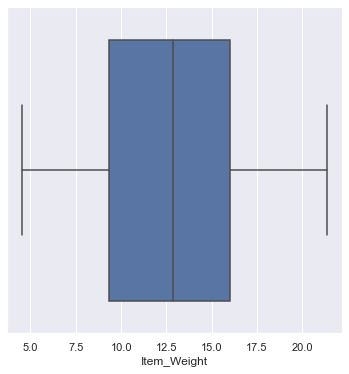

In [137]:
plt.figure(figsize=(6,6))
sns.boxplot(BigmartData['Item_Weight'])
plt.show()

In [1]:
plt.figure(figsize=(6,6))
sns.boxplot(BigmartData['Item_Visibility'])
plt.show()

NameError: name 'plt' is not defined

<Figure size 432x432 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

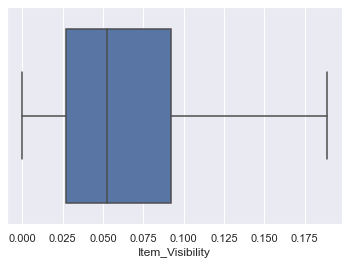

In [138]:

BigData=BigmartData.copy()

q_1 = BigmartData['Item_Visibility']. quantile(0.25)
q_3 = BigmartData['Item_Visibility']. quantile(0.75)
iqr2 = q_3 - q_1

lower_bound= q_1 -(1.40 * iqr2) 
upper_bound= q_3 +(1.40 * iqr2)
outliers2=BigmartData[(BigmartData['Item_Visibility']<lower_bound) | (BigmartData['Item_Visibility']>upper_bound)]['Item_Visibility']
BigData=BigmartData[(BigmartData['Item_Visibility']>lower_bound) & (BigmartData['Item_Visibility']<upper_bound)]
sns.boxplot(BigData['Item_Visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

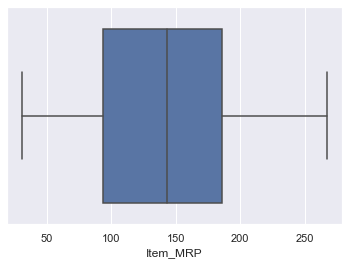

In [139]:
sns.boxplot(BigmartData['Item_MRP'])

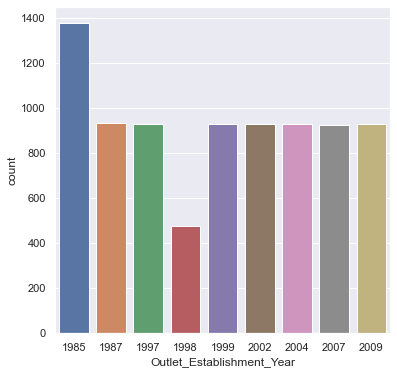

In [140]:
plt.figure(figsize=(6,6))
sns.countplot(x=BigData['Outlet_Establishment_Year'])
plt.show()

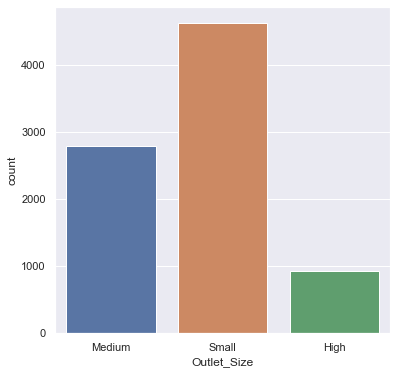

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=BigData)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(BigmartData['Item_Outlet_Sales'])
plt.show()

<Figure size 432x432 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8129 non-null   float64
 1   Item_Fat_Content           8129 non-null   object 
 2   Item_Visibility            8129 non-null   float64
 3   Item_Type                  8129 non-null   object 
 4   Item_MRP                   8129 non-null   float64
 5   Outlet_Identifier          8129 non-null   object 
 6   Outlet_Establishment_Year  8129 non-null   int64  
 7   Outlet_Size                8129 non-null   object 
 8   Outlet_Location_Type       8129 non-null   object 
 9   Outlet_Type                8129 non-null   object 
 10  Item_Outlet_Sales          8129 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 762.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


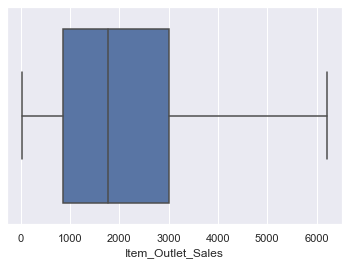

In [142]:
BigData2=BigData.copy()
q_1 = BigData['Item_Outlet_Sales']. quantile(0.25)
q_3 = BigData['Item_Outlet_Sales']. quantile(0.75)
iqr2 = q_3 - q_1

lower_bound= q_1 -(1.38 * iqr2) 
upper_bound= q_3 +(1.38 * iqr2)
outliers3=BigData[(BigData['Item_Outlet_Sales']<lower_bound) | (BigData['Item_Outlet_Sales']>upper_bound)]['Item_Outlet_Sales']
BigData2=BigData[(BigData['Item_Outlet_Sales']>lower_bound) & (BigData['Item_Outlet_Sales']<upper_bound)]
sns.boxplot(BigData2['Item_Outlet_Sales'])
BigData2.info()

Categorical features

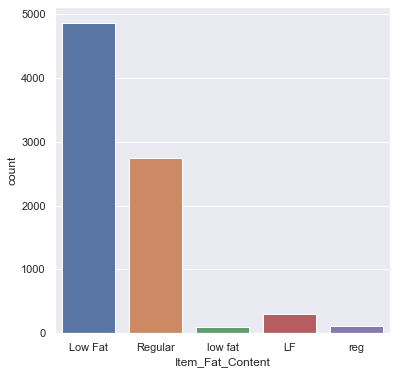

In [143]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=BigData2)
plt.show()

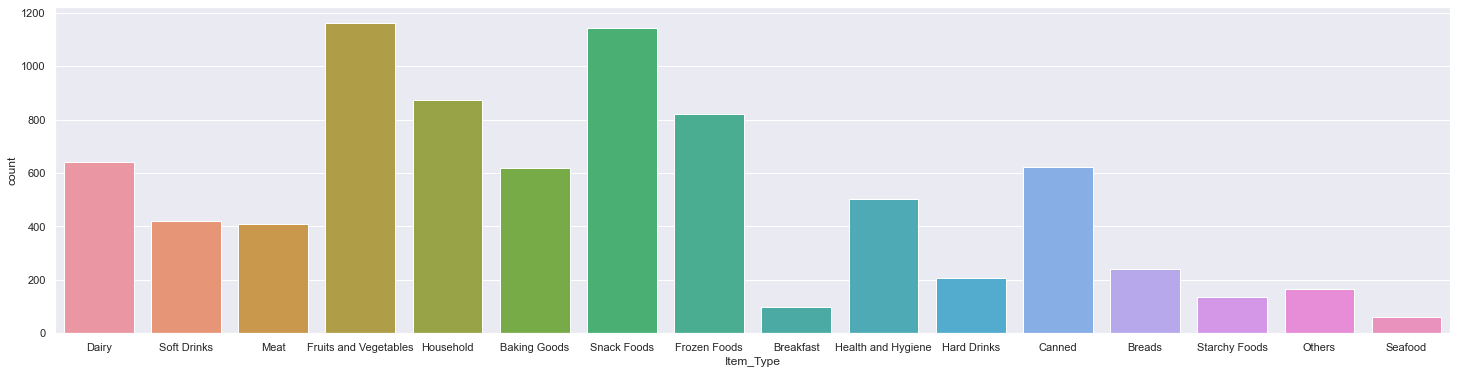

In [144]:
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type',data=BigData2)
plt.show()

Data Pre-Processing

In [146]:
BigData2['Item_Fat_Content'].value_counts()

Low Fat    4862
Regular    2745
LF          302
reg         114
low fat     106
Name: Item_Fat_Content, dtype: int64

In [147]:
BigData2.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}},inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_11124\2621284338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigData2.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}},inplace=True)


In [148]:
BigData2['Item_Fat_Content'].value_counts()

Low Fat    5270
Regular    2859
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [70]:
encoder = LabelEncoder()

In [151]:
BigData2['Item_Fat_Content']= encoder.fit_transform(BigData2['Item_Fat_Content'])
BigData2['Item_Type']= encoder.fit_transform(BigData2['Item_Type'])
BigData2['Outlet_Identifier']= encoder.fit_transform(BigData2['Outlet_Identifier'])
BigData2['Outlet_Size']= encoder.fit_transform(BigData2['Outlet_Size'])
BigData2['Outlet_Location_Type']= encoder.fit_transform(BigData2['Outlet_Location_Type'])
BigData2['Outlet_Type']= encoder.fit_transform(BigData2['Outlet_Type'])
BigData2['Outlet_Establishment_Year']= encoder.fit_transform(BigData2['Outlet_Establishment_Year'])

C:\Users\pc\AppData\Local\Temp\ipykernel_11124\513115721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigData2['Item_Fat_Content']= encoder.fit_transform(BigData2['Item_Fat_Content'])
C:\Users\pc\AppData\Local\Temp\ipykernel_11124\513115721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigData2['Item_Type']= encoder.fit_transform(BigData2['Item_Type'])
C:\Users\pc\AppData\Local\Temp\ipykernel_11124\513115721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [152]:
BigData2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,3,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [208]:
X= BigData2.drop(columns='Item_Outlet_Sales',axis=1)
Y= BigData2['Item_Outlet_Sales']
print(X)
X_norm=(X-X.mean())/X.std()
Y_norm=(Y-Y.mean())/Y.std()
X_norm.head()

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0       

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.834385,-0.736504,-1.020268,-0.768396,1.809536,1.487885,0.045388,-0.653159,-1.366997,-0.261909
1,-1.625815,1.357599,-0.949985,1.610691,-1.472989,-0.620730,1.519737,-0.653159,1.106530,1.041063
2,1.085652,-0.736504,-1.004763,0.659056,0.047403,1.487885,0.045388,-0.653159,-1.366997,-0.261909
3,1.483708,1.357599,-1.369349,-0.292579,0.706660,-1.675038,-0.323200,0.801507,1.106530,-1.564881
4,-0.921021,-0.736504,-1.369349,0.421147,-1.381908,-1.323602,-1.060375,-2.107825,1.106530,-0.261909


In [171]:
BigData2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,3,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [219]:
X_train,X_test,Y_train, Y_test= train_test_split(X_norm,Y_norm,test_size=0.2,random_state=42)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7009,-1.926699,-0.736504,1.695449,-1.482123,-0.189065,1.136449,-0.691787,0.801507,-1.366997,-0.261909
8365,-1.251174,-0.736504,0.637871,-0.292579,-0.161377,-1.675038,-0.323200,0.801507,1.106530,-1.564881
8038,-0.787555,-0.736504,-0.453031,1.610691,-1.736504,-0.972166,1.151150,0.801507,-0.130234,-0.261909
3468,0.500274,-0.736504,0.186362,0.183239,-0.178693,0.785013,0.413975,0.801507,-0.130234,-0.261909
1207,0.219293,-0.736504,0.741669,-0.768396,-1.322759,0.433577,0.782563,0.801507,-0.130234,-0.261909


In [210]:
print(X.shape,X_train.shape,X_test.shape)

(8129, 10) (6503, 10) (1626, 10)


Machine learning model training

XGBoost Regressor

In [157]:
regressor= XGBRegressor()

In [158]:
regressor.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Evaluation

In [211]:
training_data_prediction = regressor.predict(X_train)

In [212]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [213]:
print('R squared value =', r2_train)

R squared value = -226096.1864927739


In [214]:
test_data_prediction = regressor.predict(X_test)

In [215]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [216]:
print('R squared value =', r2_test)

R squared value = -222581.69852021433


Linear Regression

In [217]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
ypred=lr.predict(X_test)
yhat=lr.predict(X_train)
mse=math.sqrt(mean_squared_error(Y_test,ypred))
print('Model accuracy score with criterion gini index: {}'. format(metrics.r2_score(Y_test,ypred)))
print('Model train accuracy score with criterion gini index: {}'. format(metrics.r2_score(Y_train,yhat)))

Model accuracy score with criterion gini index: 0.46084164681913464
Model train accuracy score with criterion gini index: 0.48142080953530275


In [222]:
clf_gini = RandomForestRegressor(max_depth=5, random_state=0)
#train
clf_gini.fit(X_train,Y_train)
#predict
yhat_gini=clf_gini.predict(X_train)
#Test and compare
ypred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(metrics.r2_score(Y_test,ypred_gini)))
print('Training accuracy is : {0:0.4f}'. format(metrics.r2_score(Y_train,yhat_gini)))

Model accuracy score with criterion gini index: 0.5622
Training accuracy is : 0.5923
